<a href="https://colab.research.google.com/github/Alton1998/University-Notes/blob/main/Question_3_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sns
from sklearn.metrics import accuracy_score,jaccard_score
from skimage.segmentation import chan_vese
from skimage.color import rgb2gray

# Part 1

In [25]:
img_skin = plt.imread("Image_skin003.jpg")
img_skin_gray = rgb2gray(img_skin)
img_skin_grtruth = plt.imread("Image_skin003_GrTruth.png")

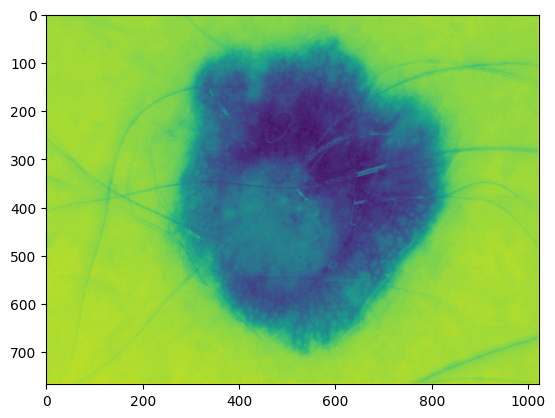

In [26]:
plt.imshow(img_skin_gray)

In [27]:
cv = chan_vese(
    img_skin_gray,
    mu=0.25,
    lambda1=1,
    lambda2=1,
    tol=1e-3,
    max_num_iter=200,
    dt=0.5,
    init_level_set="checkerboard",
    extended_output=True,
)

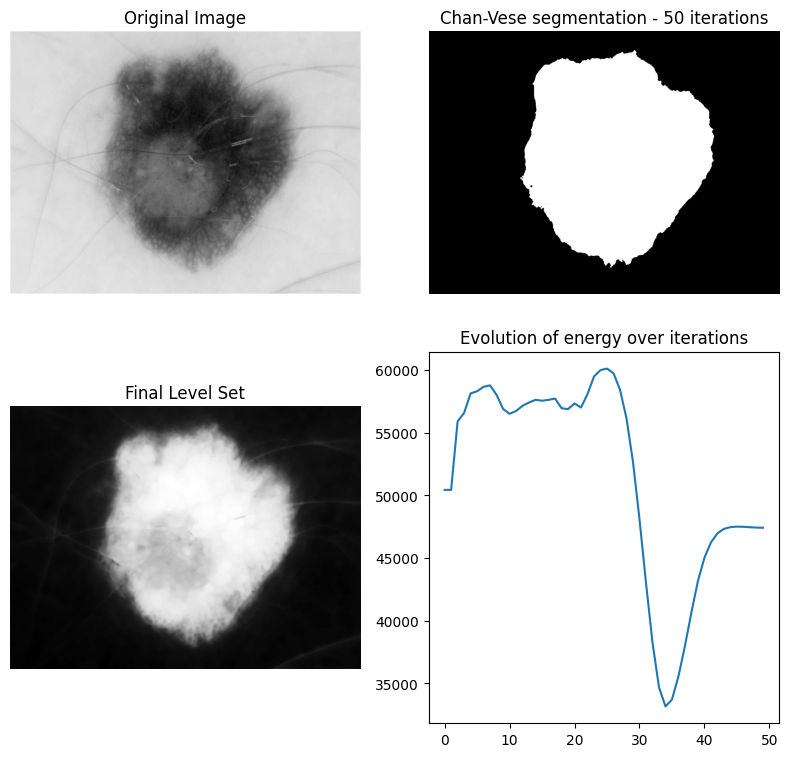

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(img_skin_gray, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = f'Chan-Vese segmentation - {len(cv[2])} iterations'
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

# Part 2

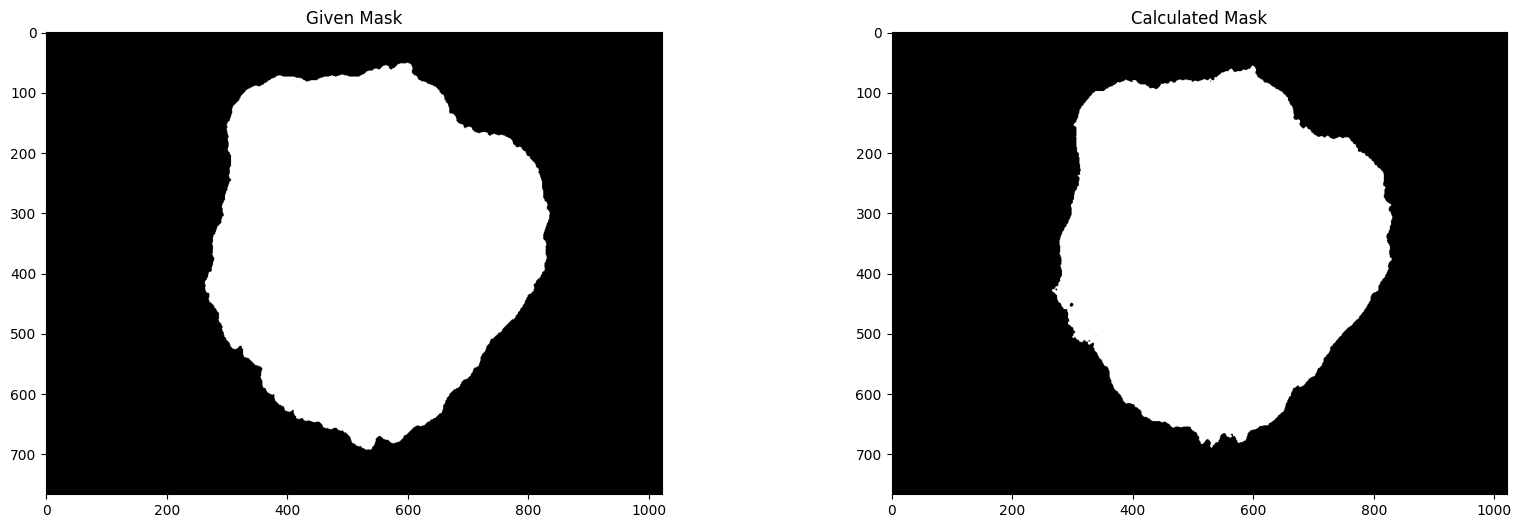

In [29]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.title("Given Mask")
plt.imshow(img_skin_grtruth,cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Calculated Mask")
plt.imshow(cv[0],cmap='gray')
plt.show()

In [30]:
accuracy_score(img_skin_grtruth.flatten(),cv[0].flatten())

0.9874023121062824

In [32]:
jaccard_score(img_skin_grtruth.flatten(),cv[0].flatten(),average="micro")

0.9751180788889183

# Part 3

# Active Contour performs better than thresholding